[David's Code](https://github.com/dgrtwo/data-screencasts/blob/master/animal-crossing.Rmd)

In [1]:
# Common Import
import pandas as pd
import numpy as np

# ignore warning
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
              
# To plot pretty figures with Plotly
import plotly.express as px
import plotly.graph_objects as go

In [64]:
# for text analysis
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



In [27]:
#critic = pd.read_table('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/critic.tsv')
#user_reviews  = pd.read_table('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/user_reviews.tsv')
#items = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/items.csv')
#villagers = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-05-05/villagers.csv')


In [1]:
# What does fct_lump do? ump together factor levels into "other"
# post_offices_cumulative = post_office_years[['year', 'state']]
# post_offices_cumulative = post_offices_cumulative.groupby(['year','state']).agg(n_post_offices=('year', 'count'))
# post_offices_cumulative = post_offices_cumulative.reset_index()
# post_offices_cumulative = post_offices_cumulative.sort_values(["state",'n_post_offices'],ascending=False)

# head_rows = post_offices_cumulative.groupby(['state']).sum()
# head_rows  = head_rows.sort_values('n_post_offices', ascending=False)
# # to get top n rows
# head_rows  = head_rows.head(16).reset_index()
# # to create list
# headrow_lst = head_rows['state'].tolist()
# headrow_lst

In [65]:
critic = pd.read_csv('critic.csv')
critic.head(10)

,grade,publication,text,date
0,100,Pocket Gamer UK,"Animal Crossing; New Horizons, much like its predecessors, operates outside of the boundaries of most games. While the most tension you'll ever feel is while sprinting away from wasps, there's a warmth and comfort in the code which you won't find almost anywhere else.",2020-03-16
1,100,Forbes,"Know that if you’re overwhelmed with the world, stuck inside, or adrift in a life that you know will look totally different next week — get Animal Crossing.",2020-03-16
2,100,Telegraph,"With a game this broad and lengthy, there’s more to discuss than I could fit in one review, but suffice it to say, this a game that Nintendo have clearly worked incredibly hard to get right. It shines at every moment, from the wind rustling through the trees, to the sunset glinting off the water to the jaunty tunes at the start of the day fading into more relaxing melodies in the evening. Add dozens of much needed quality of life features (hello player customisation, autosave, couch co-op, and eight-player online play) and it all adds up to the perfect DIY recipe for the most chilled out, relaxing, and engaging life simulator ever.",2020-03-16
3,100,VG247,"Animal Crossing: New Horizons is everything I hoped it would be, and it’s yet another stellar release that showcases a confident Nintendo at its best. It is excellent, and is easily another must-own Switch title – at least, if you can understand and embrace Animal Crossing’s uniquely lazy pace.",2020-03-16
4,100,Nintendo Insider,"Above all else, Animal Crossing: New Horizons is an unbeatable feel-good experience and an essential purchase for anyone that owns a Nintendo Switch. As heartwarming as it is wholesome, Nintendo has delivered meaningful changes that help to structure your peaceful island existence. Every day has the potential to offer something new, and, thanks to that, it will be a game that many will enjoy investing countless hours (and Bells) in. Oh, and heroically leaping across rivers with the Vault Pole will never get old.",2020-03-16
5,100,Trusted Reviews,"Animal Crossing: New Horizons is the best game I've played this year, and immediately cements itself as one of the generation's defining experiences. Fans will be playing it for years, watching as the seasons roll by and unveil the true potential of what has been created here.",2020-03-16
6,100,VGC,Nintendo's comforting life sim is a tranquil haven at a time the world needs it most.,2020-03-16
7,100,God is a Geek,"A beautiful, welcoming game that is everything and anything you want it to be. This is one you'll play all year and beyond, and it's exactly what the world needs right now.",2020-03-16
8,100,Nintendo Life,"Animal Crossing: New Horizons takes Animal Crossing and not only drags it back onto home consoles, but improves upon every single facet imaginable. There's more to do, more to see, more to change, more to mould, and more to love; fans and first-time players are going to find themselves losing hours at a time gathering materials, creating new furniture, and making their island undeniably theirs. Every moment is unashamedly blissful, with excellently-written characters that truly feel alive and an island paradise that gives infinitely back more than you put in. Back when Animal Crossing: New Leaf hit the shelves all those years ago and created a whole new generation of fans, many people were wondering how Nintendo could possibly top it, but here we have our answer. This is a masterpiece that has been well worth waiting for.",2020-03-16
9,100,Daily Star,"Similar to how Breath of the Wild and Odyssey reimagined 3D Zelda and Mario, New Horizons represents an exciting new milestone for the Animal Crossing series. By truly handing the player the reins, Nintendo has delivered a deeply customisable and effortlessly joyous experience which is, quite simply, an essential purchase for all Switch owners.",2020-03-16


In [66]:
user_reviews  = pd.read_csv('user_reviews.csv')
user_reviews.head(10)

,grade,user_name,text,date
0,4,mds27272,"My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.",2020-03-20
1,5,lolo2178,"While the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you haveWhile the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you have the other usershouse and furniture. I hope nintendo can soon fix this big issue, because for now, this killed any intentions i had to play the game.… Expand",2020-03-20
2,0,Roachant,"My wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one personMy wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one person in your home that wants to play the game, you need two switches. Worst decision I have ever seen, this even beats EA.Congratulations Nintendo, you have officially become the worst video game company this year!… Expand",2020-03-20
3,0,Houndf,"We need equal values and opportunities for all players on the island! My wife is the first player, which is great but I do not want to wait for her progress. At the same time, I do not want her to have a a second class player experience if I am the founder. Fix this Nintendo!!",2020-03-20
4,0,ProfessorFox,BEWARE! If you have multiple people in your house that want to play this game they can not each have their own account (island). ONLY ONE customizable island can be played per Switch. Even if you buy two copies of the game you will still only be able to customize ONE island. I have 3 kids that want to play this game and they each want to customize their own island - AND THEY CANT!BEWARE! If you have multiple people in your house that want to play this game they can not each have their own account (island). ONLY ONE customizable island can be played per Switch. Even if you buy two copies of the game you will still only be able to customize ONE island. I have 3 kids that want to play this game and they each want to customize their own island - AND THEY CANT! This is absolutely unacceptable. Maybe the dumbest thing Nintendo has ever done. I have owned every Nintendo console since the original NES and I can not think of a worse decision by Nintendo.… Expand,2020-03-20
5,0,tb726,"The limitation of one island per Switch (not per cartridge, per Switch) is nonsensical. It‘s obvious Nintendo is just trying to sell more Switch consoles. This means only one person in your family can enjoy the game to its fullest extent. Player 2 can barely do anything, and

In [5]:
items = pd.read_csv('items.csv')
items.head(10)

,num_id,id,name,category,orderable,sell_value,sell_currency,buy_value,buy_currency,sources,customizable,recipe,recipe_id,games_id,id_full,image_url
0,12,3d-glasses,3D Glasses,Accessories,NaN,122.0,bells,490.0,bells,NaN,NaN,NaN,NaN,nh,item-3d-glasses,https://villagerdb.com/images/items/full/3d-glasses.b8e1b5a.png
1,14,a-tee,A Tee,Tops,NaN,140.0,bells,560.0,bells,NaN,NaN,NaN,NaN,nh,item-a-tee,https://villagerdb.com/images/items/full/a-tee.a1af443.png
2,17,abstract-wall,Abstract Wall,Wallpaper,True,390.0,bells,1560.0,bells,Nook's Cranny,NaN,NaN,NaN,nh,NaN,NaN
3,19,academy-uniform,Academy Uniform,Dresses,NaN,520.0,bells,2080.0,bells,NaN,NaN,NaN,NaN,nh,item-academy-uniform,https://villagerdb.com/images/items/full/academy-uniform.4475eb5.png
4,20,acanthostega,Acanthostega,Fossils,False,2000.0,bells,NaN,NaN,Underground (dig spot),NaN,NaN,NaN,nh,item-acanthostega,https://villagerdb.com/images/items/thumb/acanthostega.0611938.png
5,21,accessories-stand,Accessories Stand,Furniture,True,375.0,bells,1500.0,bells,Nook's Cranny,FALSE,NaN,NaN,nh,item-accessories-stand,https://villagerdb.com/images/items/thumb/accessories-stand.7707e11.png
6,23,acid-washed-jacket,Acid-washed Jacket,Tops,True,420.0,bells,1680.0,bells,Able Sisters,NaN,NaN,NaN,nh,item-acid-washed-jacket,https://villagerdb.com/images/items/full/acid-washed-jacket.4cb3530.png
7,24,acid-washed-jeans,Acid-washed Jeans,Bottoms,True,330.0,bells,1320.0,bells,Able Sisters,NaN,NaN,NaN,nh,item-acid-washed-jeans,https://villagerdb.com/images/items/full/acid-washed-jeans.b25de9d.png
8,26,acnh-nintendo-switch,Acnh Nintendo Switch,Furniture,True,8990.0,bells,35960.0,bells,Receive in mail if playing on ACNH Switch,FALSE,NaN,NaN,nh,item-acnh-nintendo-switch,https://villagerdb.com/images/items/thumb/acnh-nintendo-switch.05f3283.png
9,26,acnh-nintendo-switch,Acnh Nintendo Switch,Furniture,True,8990.0,bells,35960.0,bells,Nook Shopping,FALSE,NaN,NaN,nh,item-acnh-nintendo-switch,https://villagerdb.com/images/items/thumb/acnh-nintendo-switch.05f3283.png


In [28]:
villagers = pd.read_csv('villagers.csv')
villagers.head(10)

,row_n,id,name,gender,species,birthday,personality,song,phrase,full_id,url
0,2,admiral,Admiral,male,bird,1-27,cranky,Steep Hill,aye aye,villager-admiral,https://villagerdb.com/images/villagers/thumb/...
1,3,agent-s,Agent S,female,squirrel,7-2,peppy,DJ K.K.,sidekick,villager-agent-s,https://villagerdb.com/images/villagers/thumb/...
2,4,agnes,Agnes,female,pig,4-21,uchi,K.K. House,snuffle,villager-agnes,https://villagerdb.com/images/villagers/thumb/...
3,6,al,Al,male,gorilla,10-18,lazy,Steep Hill,Ayyeeee,villager-al,https://villagerdb.com/images/villagers/thumb/...
4,7,alfonso,Alfonso,male,alligator,6-9,lazy,Forest Life,it'sa me,villager-alfonso,https://villagerdb.com/images/villagers/thumb/...
5,8,alice,Alice,female,koala,8-19,normal,Surfin' K.K.,guvnor,villager-alice,https://villagerdb.com/images/villagers/thumb/...
6,9,alli,Alli,female,alligator,11-8,snooty,K.K. Chorale,graaagh,villager-alli,https://villagerdb.com/images/villagers/thumb/...
7,10,amelia,Amelia,female,eagle,11-19,snooty,K.K. Condor,eaglet,villager-amelia,https://villagerdb.com/images/villagers/thumb/...
8,11,anabelle,Anabelle,female,anteater,2-16,peppy,Aloha K.K.,snorty,villager-anabelle,https://villagerdb.com/images/villagers/thumb/...
9,13,anchovy,Anchovy,male,bird,3-4,lazy,K.K. Ragtime,chuurp,villager-anchovy,https://villagerdb.com/images/villagers/thumb/...


# TEXT Analysis

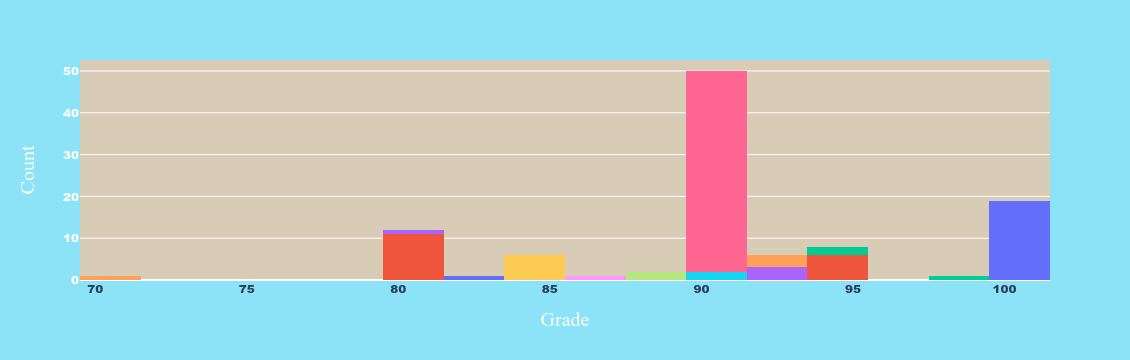

In [58]:
fig = px.histogram(critic, x='grade', color='grade')

fig.update_layout(
                showlegend =False,
                paper_bgcolor = '#8ce2f7',
                  plot_bgcolor = '#d8ccb6'
                             )
# Update axes
fig.update_xaxes(title_text = "Grade", title_font = dict(size=20,family='Time NEw Roman' ,color='white'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_text = "Count",title_font=dict(size=20, family='Times New Roman'), color='white')
fig.update_yaxes(tickfont_family="Arial Black")


fig.show()


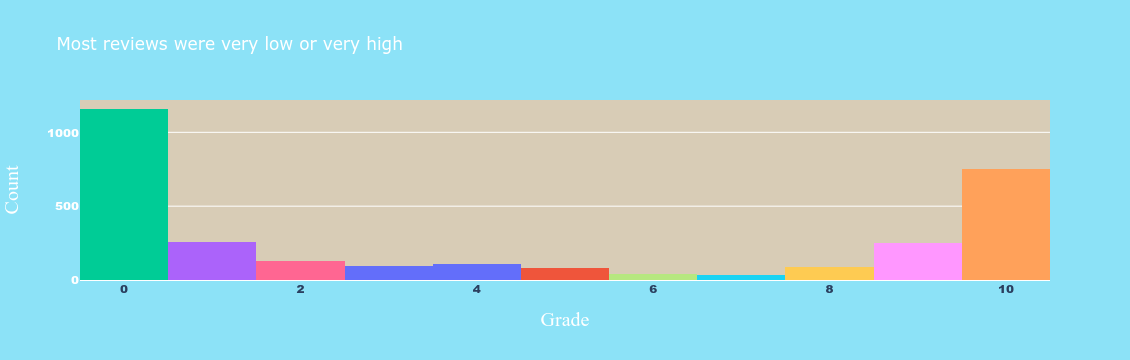

In [61]:
fig = px.histogram(user_reviews, x='grade', color = 'grade', title='Most reviews were very low or very high')
# Layout setting 
fig.update_layout(title_font_color = 'white', 
                showlegend =False,
                paper_bgcolor = '#8ce2f7',
                  plot_bgcolor = '#d8ccb6'
                             )
# Update axes
fig.update_xaxes(title_text = "Grade", title_font = dict(size=20,family='Time NEw Roman' ,color='white'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_text = "Count",title_font=dict(size=20, family='Times New Roman'), color='white')
fig.update_yaxes(tickfont_family="Arial Black")


fig.show()

In [40]:
user_reviews['text'].head(5)

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unaccept

In [6]:
import string # to remove punctutions
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

user_review_words = user_reviews

#remove punctuations
user_review_words['text'] = user_review_words['text'].apply(remove_punctuations)

user_review_words['text'] = user_review_words['text'].str.lower()

# tokenize words using nltk's word_tokenize
user_review_words['word'] = user_review_words['text'].apply(word_tokenize)

# remove stop words
# tidytext stopwords
stop_words = pd.read_csv('stop_words.csv')
stop_words = stop_words['word'].tolist()

user_review_words['word'] = user_review_words['word'].apply(lambda words: [word for word in words if word not in stop_words])
user_review_words = user_review_words[['user_name' , 'grade' ,'date', 'word']]
user_review_words = user_review_words.explode('word')

user_review_words


,user_name,grade,date,word
0,mds27272,4,2020-03-20,gf
0,mds27272,4,2020-03-20,started
0,mds27272,4,2020-03-20,playing
0,mds27272,4,2020-03-20,option
0,mds27272,4,2020-03-20,create
...,...,...,...,...
2998,DwerG,4,2020-05-03,island
2998,DwerG,4,2020-05-03,console
2998,DwerG,4,2020-05-03,basically
2998,DwerG,4,2020-05-03,makes


In [54]:
user_review_words = user_review_words.groupby(['user_name', 'grade', 'date', 'word']).agg(n=('word','count'))
user_review_words = user_review_words.reset_index()

#user_review_words = user_review_words.sort_values('date', ascending=True)
user_review_words


,user_name,grade,date,word,n
0,000PLAYER000,10,2020-03-20,playing,1
1,000PLAYER000,10,2020-03-20,stop,1
2,000anon2759,0,2020-04-01,anticonsumer,1
3,000anon2759,0,2020-04-01,console,1
4,000anon2759,0,2020-04-01,disappointing,1
...,...,...,...,...,...
90833,zyzolol,0,2020-03-26,trust,1
90834,zyzolol,0,2020-03-26,verdict,1
90835,zyzolol,0,2020-03-26,video,1
90836,zyzolol,0,2020-03-26,warcraft,1


In [68]:
by_week = user_reviews
# group_by(week = floor_date(date, "week", week_start = 1))
by_week['week'] = pd.to_datetime(by_week['date']).dt.to_period('W').dt.to_timestamp()
by_week

,grade,user_name,text,date,week
0,4,mds27272,"My gf started playing before me. No option to create my own island and guys, being the 2nd player to start on a console SUCKS!!!! You miss out on so much that only the 1st player gets in terms of activities, resources, etc. It's absolutely terrible. You have to buy a 2nd console if more than one person in your household wants to get the full game experience. That's unacceptable.",2020-03-20,2020-03-16
1,5,lolo2178,"While the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you haveWhile the game itself is great, really relaxing and gorgeous, i can't ignore one thing that ruins the whole experience for me and a lot of other people as seen by the different user reviews.That thing is that you only have 1 island per console. This decision limits to one person being able to enjoy the full experience. It also nukes any creative control of the island, since you have the other usershouse and furniture. I hope nintendo can soon fix this big issue, because for now, this killed any intentions i had to play the game.… Expand",2020-03-20,2020-03-16
2,0,Roachant,"My wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one personMy wife and I were looking forward to playing this game when it released. I bought it, I let her play first she made an island and played for a bit. Then I decided to play only to discover that Nintendo only allows one island per switch! Not only that, the second player cannot build anything on the island and tool building is considerably harder to do. So, if you have more than one person in your home that wants to play the game, you need two switches. Worst decision I have ever seen, this even beats EA.Congratulations Nintendo, you have officially become the worst video game company this year!… Expand",2020-03-20,2020-03-16
3,0,Houndf,"We need equal values and opportunities for all players on the island! My wife is the first player, which is great but I do not want to wait for her progress. At the same time, I do not want her to have a a second class player experience if I am the founder. Fix this Nintendo!!",2020-03-20,2020-03-16
4,0,ProfessorFox,BEWARE! If you have multiple people in your house that want to play this game they can not each have their own account (island). ONLY ONE customizable island can be played per Switch. Even if you buy two copies of the game you will still only be able to customize ONE island. I have 3 kids that want to play this game and they each want to customize their own island - AND THEY CANT!BEWARE! If you have multiple people in your house that want to play this game they can not each have their own account (island). ONLY ONE customizable island can be played per Switch. Even if you buy two copies of the game you will still only be able to customize ONE island. I have 3 kids that want to play this game and they each want to customize their own island - AND THEY CANT! This is absolutely unacceptable. Maybe the dumbest thing Nintendo has ever done. I have owned every Nintendo console since the original NES and I can not think of a worse decision by Nintendo.… Expand,2020-03-20,2020-03-16
...,...,...,...,...,...
2994,1,TakezoShinmen,1 Island for console limitation.I cannot play this game because my girlfriend has played 125 hours and I want my own new Game.Fix that ****,2020-05-03,2020-04-27
2995,1,Pikey17,"Per

In [69]:
#  summarize(nb_reviews = n(),
#            avg_grade = mean(grade),
#            pct_zero = mean(grade == 0),
#            pct_ten = mean(grade == 10))

by_week = by_week.groupby(['week']).agg(nb_reviews=('text','count'),
                                       avg_grade=('grade', 'mean'),
                                       pct_zero = ('grade',lambda x: (x==0).mean()),
                                       pct_ten = ('grade', lambda x: (x==10).mean()))


                                     
by_week = by_week.reset_index()
by_week

,week,nb_reviews,avg_grade,pct_zero,pct_ten
0,2020-03-16,233,6.193133,0.274678,0.437768
1,2020-03-23,1596,4.459273,0.377193,0.288221
2,2020-03-30,387,2.906977,0.462532,0.136951
3,2020-04-06,241,3.381743,0.448133,0.157676
4,2020-04-13,202,2.970297,0.500000,0.123762
5,2020-04-20,104,3.125000,0.403846,0.086538
6,2020-04-27,236,5.182203,0.262712,0.275424


In [ ]:
# Function to change marker size based on values:

def set_size(x):
    if x <= 500:
        return 10
    elif (x>500) and (x<=1000):
        return 20
    else:
        return 30

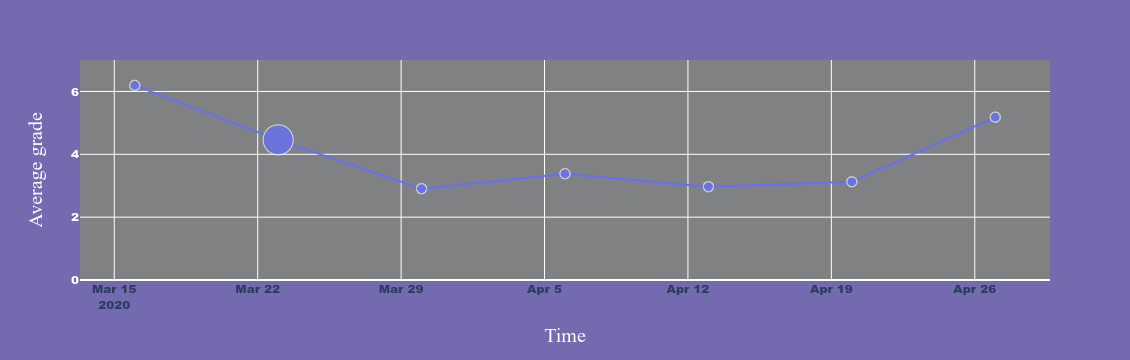

In [62]:
# create line plot using plotl

fig = px.line(by_week, x='week', y='avg_grade')
fig.update_traces(mode='markers+lines')

# use map and set_size to change size of marker                                   
fig.update_traces(marker=dict(size=list(map(set_size,by_week['nb_reviews']))))

fig.update_yaxes(range=[0, 7])

# Layout setting 
fig.update_layout(paper_bgcolor = '#746AB0',
                  plot_bgcolor = '#808182'
                             )
# Update axes
fig.update_xaxes(title_text = "Time", title_font = dict(size=20,family='Time NEw Roman' ,color='white'))
fig.update_xaxes(tickfont_family="Arial Black")

fig.update_yaxes(title_text = "Average grade",title_font=dict(size=20, family='Times New Roman'), color='white')
fig.update_yaxes(tickfont_family="Arial Black")



fig.show()

In [70]:
# http://connor-johnson.com/2014/08/28/tidyr-and-pandas-gather-and-melt/
def gather(df ,key, value, cols):
    id_vars = [col for col in df.columns if col not in cols]
    id_values = cols
    var_name = key
    value_name  = value
    return pd.melt(df, id_vars, id_values, var_name, value_name)




In [72]:
by_week = gather(by_week, 'type', 'value',['pct_zero', 'pct_ten'])
by_week

,week,nb_reviews,avg_grade,type,value
0,2020-03-16,233,6.193133,pct_zero,0.274678
1,2020-03-23,1596,4.459273,pct_zero,0.377193
2,2020-03-30,387,2.906977,pct_zero,0.462532
3,2020-04-06,241,3.381743,pct_zero,0.448133
4,2020-04-13,202,2.970297,pct_zero,0.500000
5,2020-04-20,104,3.125000,pct_zero,0.403846
6,2020-04-27,236,5.182203,pct_zero,0.262712
7,2020-03-16,233,6.193133,pct_ten,0.437768
8,2020-03-23,1596,4.459273,pct_ten,0.288221
9,2020-03-30,387,2.906977,pct_ten,0.136951


[How to unest(explode) column](https://stackoverflow.com/questions/53218931/how-to-unnest-explode-a-column-in-a-pandas-dataframe)

[How to do a conditional count after groupby on a Pandas Dataframe?](https://newbedev.com/how-to-do-a-conditional-count-after-groupby-on-a-pandas-dataframe)

[Python Pandas aggregation with condition](https://stackoverflow.com/questions/51631096/python-pandas-aggregation-with-condition/51631194)